# 4. Data Visualization <a class="anchor"  id="chapter4"></a>

Before I build out my models, I think it will be helpful to visualize the features in the training dataset and their relationships to passenger survival. What story is the data telling about who was rescued and who was not?

In [27]:
# Split combined dataset back into training and test sets based on 'Survived' missingness
train_original = combined_cleaned[(combined_cleaned['Survived']==1) | (combined_cleaned['Survived']==0)]
test_original = combined_cleaned[combined_cleaned['Survived'].isna()]

### How are the categorical features correlated with survival?

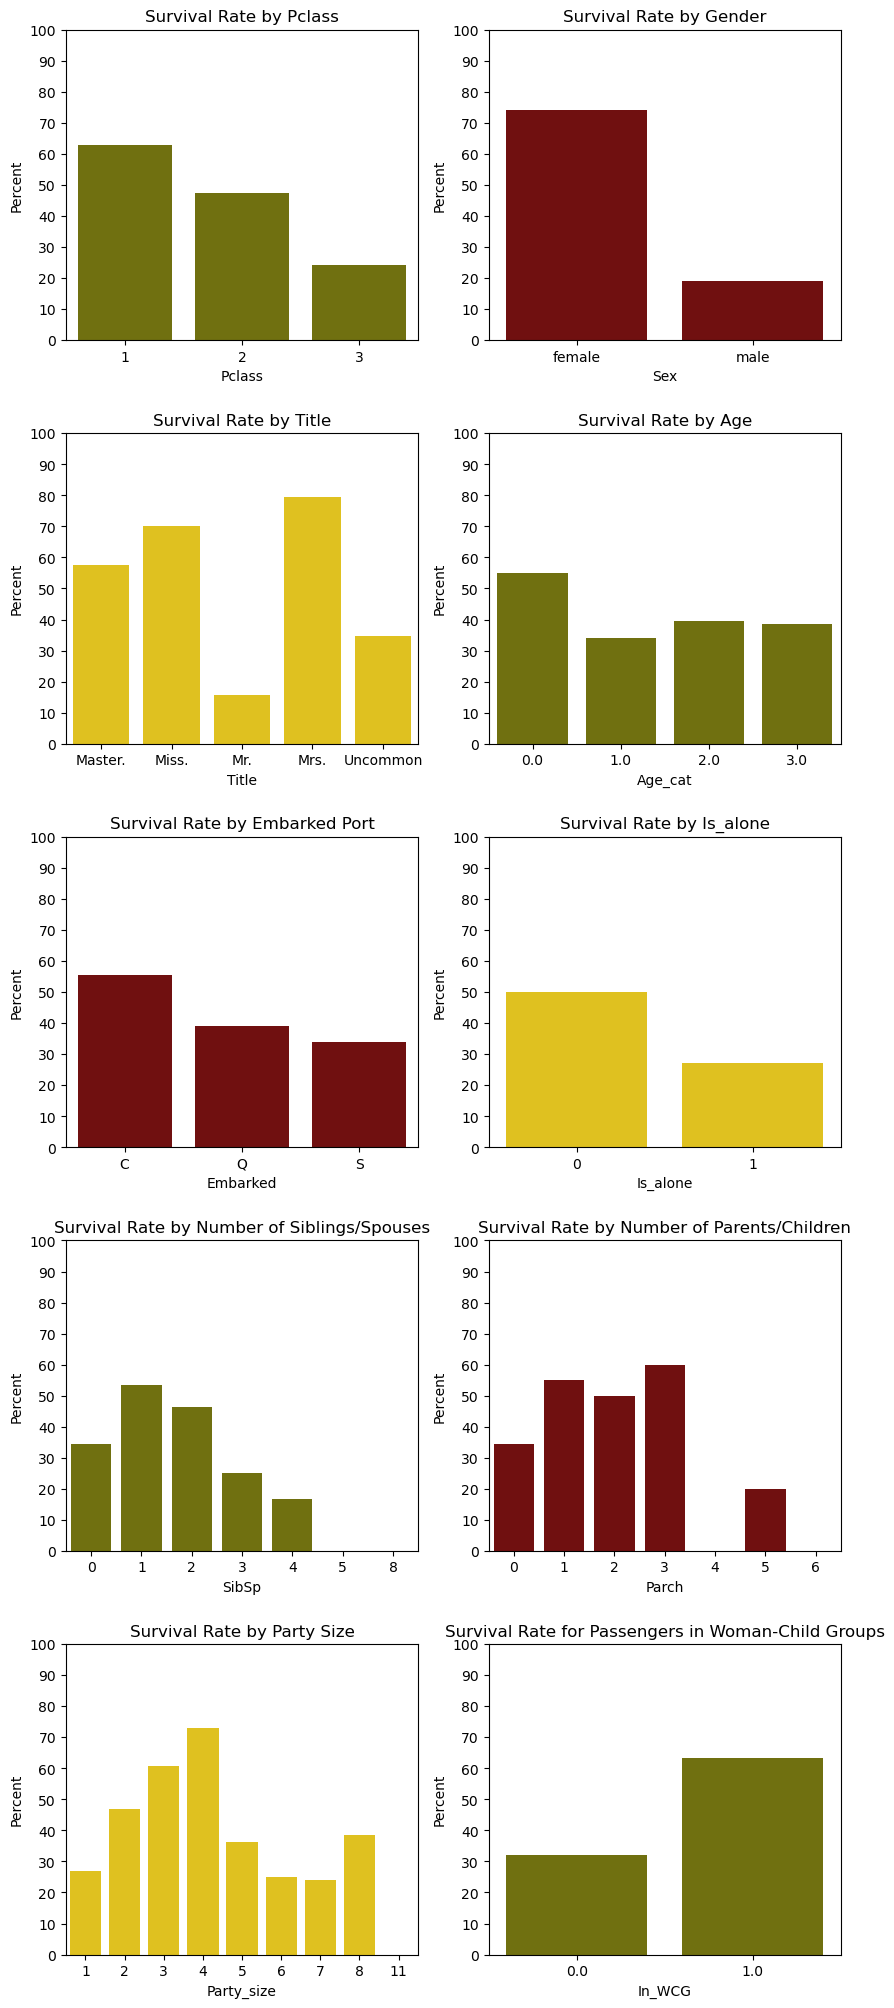

In [28]:
def plot_survival_rate(data, x_col, y_col, title, color, ax):
    survival_rate = data.groupby(x_col)[y_col].value_counts(normalize=True).unstack()
    survival_rate = survival_rate[1]
    sns.barplot(x=survival_rate.index, y=survival_rate.values, color=color, ax=ax)
    ax.set_title(title)
    ax.set_yticks(ticks=np.arange(0,1.1,0.1), labels=np.arange(0,110,10))
    ax.set_ylabel('Percent')

fig, axs = plt.subplots(5,2,figsize=(10,25))

plot_survival_rate(train_original, 'Pclass', 'Survived', 'Survival Rate by Pclass', 'olive', axs[0,0])
plot_survival_rate(train_original, 'Sex', 'Survived', 'Survival Rate by Gender', 'maroon', axs[0,1])
plot_survival_rate(train_original, 'Title', 'Survived', 'Survival Rate by Title', 'gold', axs[1,0])
plot_survival_rate(train_original, 'Age_cat', 'Survived', 'Survival Rate by Age', 'olive', axs[1,1])
plot_survival_rate(train_original, 'Embarked', 'Survived', 'Survival Rate by Embarked Port', 'maroon', axs[2,0])
plot_survival_rate(train_original, 'Is_alone', 'Survived', 'Survival Rate by Is_alone', 'gold', axs[2,1])
plot_survival_rate(train_original, 'SibSp', 'Survived', 'Survival Rate by Number of Siblings/Spouses', 'olive', axs[3,0])
plot_survival_rate(train_original, 'Parch', 'Survived', 'Survival Rate by Number of Parents/Children', 'maroon', axs[3,1])
plot_survival_rate(train_original, 'Party_size', 'Survived', 'Survival Rate by Party Size', 'gold', axs[4,0])
plot_survival_rate(train_original, 'In_WCG', 'Survived', 'Survival Rate for Passengers in Woman-Child Groups', 'olive', axs[4,1])

plt.subplots_adjust(hspace=0.3)
plt.show()


If you were a male passenger traveling alone in third class, between the ages of 14 and 28, and embarked from Southhampton... it looks like your chances were pretty dismal. 

On the other hand, if you were a young girl traveling with others in first class, and embarked from Cherbourg, you may have turned out alright. 

It looks like passengers were more likely to get rescued as their party size increased, but after there were 4 passengers in a group, the effect faded disappeared quickly. As women and children had higher survival rates, it would make sense that those in Woman-Child-Groups would have higher survival rates as well.

Were people who embarked from Cherbourg just lucky? Maybe there's something else at play here to explain the difference in survival rates between ports.

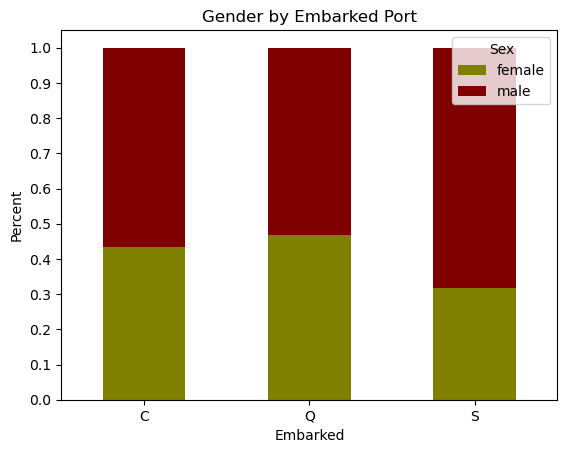

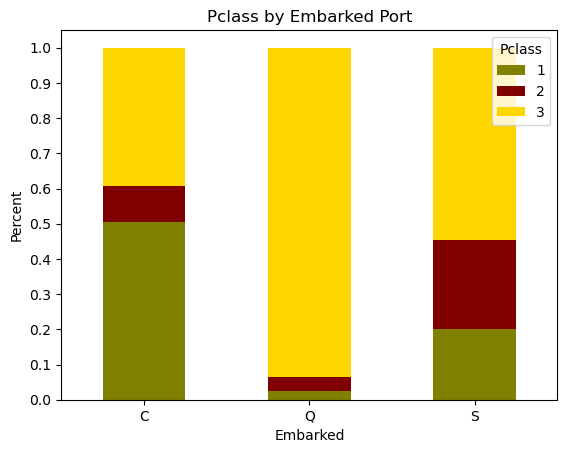

In [29]:
train_original.groupby('Embarked')['Sex'].value_counts(normalize=True).unstack().plot.bar(stacked=True, color=['olive', 'maroon'])
plt.title('Gender by Embarked Port')
plt.ylabel('Percent')
plt.xticks(rotation=360)
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.show()

train_original.groupby('Embarked')['Pclass'].value_counts(normalize=True).unstack().plot.bar(stacked=True, color=['olive', 'maroon', 'gold'])
plt.title('Pclass by Embarked Port')
plt.ylabel('Percent')
plt.xticks(rotation=360)
plt.yticks(ticks=np.arange(0,1.1,0.1))
plt.show()


It looks like those who embarked from Cherbourg were more likely to fall into the first passenger class, which could explain their increased survival rate compared to passengers who embarked from Queenstown or Southampton.

### How is passenger fare correlated with survival?

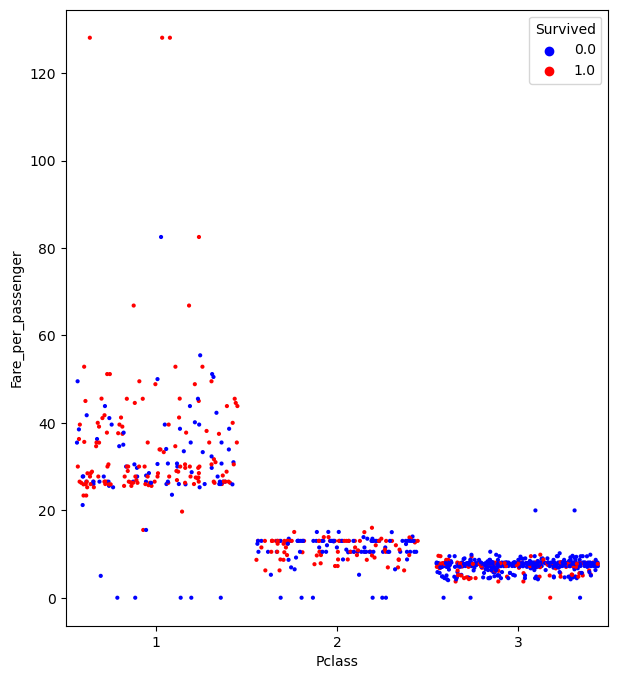

In [30]:
fig, axs = plt.subplots(figsize=(7,8))
sns.stripplot(x='Pclass', y='Fare_per_passenger', hue='Survived', data=train_original, jitter=0.45, size=3, palette=['blue', 'red'])
plt.show()

As we can see in the above plot, passenger fare is split up by class, which is expected. In addition, it looks like those who paid more were also more likely to be rescued. Women & children first, and then first class passengers!

Now that I have a good idea of the story the data is telling, I will build some models to help us predict the survival of the passengers in the test set.